In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from scipy.signal import find_peaks

In [2]:
# Usage
directory = './06262/'
filename = '06262_0_vd_00003-00004.dat'

In [10]:
def read_dat_three_columns(file_path):
    # First, detect how many header lines to skip
    skip_rows = 0
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            try:
                # Try converting first token to float to detect numeric start
                float(parts[0])
                break  # found first numeric line
            except (ValueError, IndexError):
                skip_rows += 1
    
    # Load only numeric data
    data = np.loadtxt(file_path, skiprows=skip_rows)
    
    if data.shape[1] != 3:
        raise ValueError(f"Expected 3 columns, but got {data.shape[1]} columns")
    
    return data

In [25]:
data = read_dat_three_columns(directory + filename)
#print(data)
x, y = data[:, 0], data[:, 1]
peaks, _ = find_peaks(y)

# Identify peaks near the two target q values
target_qs = [0.14, 1.4]
tolerance = 0.05
peak_positions = []
for target in target_qs:
    mask = (x[peaks] > target - tolerance) & (x[peaks] < target + tolerance)
    if np.any(mask):
        idx_max = peaks[mask][np.argmax(y[peaks][mask])]
        peak_positions.append(x[idx_max])
    else:
        peak_positions.append(None)

2*np.pi/np.array(peak_positions)/10

array([4.00491059, 0.45018703])

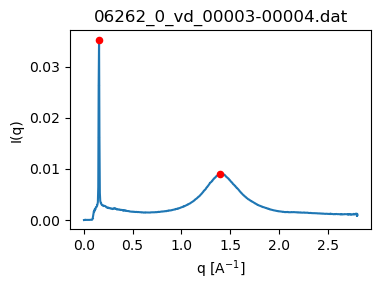

In [26]:
plt.figure(figsize=(4,3))
plt.errorbar(data[:,0], data[:,1], data[:,2])
plt.title(filename)
for pos in peak_positions:
    if pos is not None:
        plt.scatter(pos, y[np.argmin(np.abs(x - pos))], 
                    color='red', s=20, zorder=5, label=f"Peak at {pos:.3f}")
plt.xlabel(r'q [A$^{-1}$]')
plt.ylabel('I(q)')
plt.tight_layout()
plt.show()

In [27]:
peak_positions.extend(2*np.pi/np.array(peak_positions)/10)


In [28]:
peak_positions

[0.15688703060074635,
 1.3956833241754707,
 4.004910592749593,
 0.45018703013389594]